In [134]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Number of examples.
N = 1000

# Generate a random n-class classification problem.
X, y = make_classification(n_samples=N, n_features=2, n_informative=2, n_redundant=0)

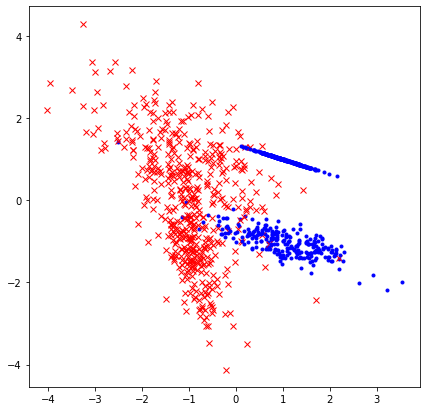

In [135]:
figure = plt.figure(figsize=(7, 7))
for i in range(0, N):
    if(y[i]==True): 
        plt.plot(X[i,0],X[i,1],'b.')
    else:
        plt.plot(X[i,0],X[i,1],'rx')

plt.show()

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.9166666666666666

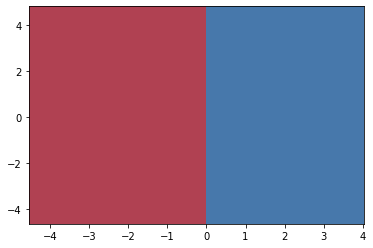

In [137]:
h = .02  # step size in the mesh

cm = plt.cm.RdBu

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = bnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

for i in range(0,len(Z)):
    if(Z[i] > 0.5):
        Z[i] = 1.0
    else:
        Z[i] = 0.0

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.show()